In [1]:
# needed imports
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# importing bsplines utilities
from bsplines_utilities import find_span, all_bsplines, point_on_nurbs_surface, point_on_bspline_surface, insert_knot_bspline_surface, insert_knot_nurbs_surface

# B-Splines surfaces

The B-spline surface in $\mathbb{R}^d$ associated to knots $(T_u, T_v)$ where $T_u=(u_i)_{0\leqslant i \leqslant n_u + p_u + 1}$ and $T_v=(v_i)_{0\leqslant i \leqslant n_v + p_v + 1}$, and control points $(\mathbf{P}_{ij})_{ 0 \leqslant i \leqslant n_u,  0 \leqslant j \leqslant n_v}$ is defined by :
$$
\mathcal{C}(u,v) = \sum_{i=0}^{n_u} \sum_{j=0}^{n_v} N_i^{p_u}(u) N_j^{p_v}(v) \textbf{P}_{i,j}
$$


**Example 1**:

In this first example, we consider a surface that approximate the function $(u,v) \mapsto \sin(\pi u) \sin(\pi v)$

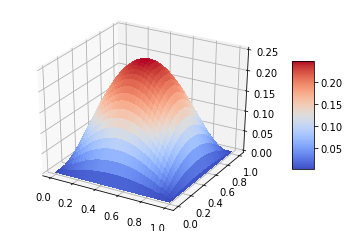

In [3]:
def example_1():    
    Tu = [0., 0., 0., 1., 1., 1.]
    pu = 2
    nu = len(Tu) - pu - 1

    Tv = [0., 0., 0., 1., 1., 1.]
    pv = 2
    nv = len(Tv) - pv - 1

    P = np.zeros((nu, nv,1))
    
    gridu = np.linspace(0., 1., nu)
    gridv = np.linspace(0., 1., nv)
    
    for i,u in enumerate(gridu):
        for j,v in enumerate(gridv):
            P[i, j, 0] = np.sin(np.pi*u)*np.sin(np.pi*v)
    
    nx = 101
    xs = np.linspace(0., 1., nx)
    
    ny = 101
    ys = np.linspace(0., 1., ny)
    
    Q = np.zeros((nx, ny, 1))
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            Q[i,j,:] = point_on_bspline_surface(Tu, Tv, P, x, y)
            
    fig = plt.figure()
    ax = fig.gca(projection='3d')
  
    X, Y = np.meshgrid(xs, ys)
    Z = Q[:,:,0]

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

example_1()

**Example 2**:

This example shows the construction of a square in 2D.
The B-Spline surface is created using the function **make_square**

In [4]:
def make_square(origin=(0,0), length=1.):
    Tu  = [0., 0., 1., 1.]
    Tv  = [0., 0., 1., 1.]
    pu = 1
    pv = 1
    nu = len(Tu) - pu - 1
    nv = len(Tv) - pv - 1
    gridu = np.unique(Tu)
    gridv = np.unique(Tv)

    origin = np.asarray(origin)

    P = np.asarray([[[0.,0.],[0.,1.]],[[1.,0.],[1.,1.]]])
    for i in range(0, 2):
        for j in range(0, 2):
            P[i,j,:] = origin + P[i,j,:]*length

    return (Tu, Tv), (pu, pv), P

In [5]:
def plot_surface(knots, degrees, P, weights=None, Nu=101, Nv=101, color='b'):
    Tu, Tv = knots
    pu, pv = degrees

    nu = len(Tu) - pu - 1
    nv = len(Tv) - pv - 1
    gridu = np.unique(Tu)
    gridv = np.unique(Tv)

    us = np.linspace(0., 1., Nu)
    vs = np.linspace(0., 1., Nv)

    # ...
    Q = np.zeros((Nv, 2))
    if weights is None:
        for i,u in enumerate(gridu):
            for j,v in enumerate(vs):
                Q[j,:] = point_on_bspline_surface(Tu, Tv, P, u, v)
                
            plt.plot(Q[:,0], Q[:,1], '-'+color)

    else:
        for i,u in enumerate(gridu):
            for j,v in enumerate(vs):
                Q[j,:] = point_on_nurbs_surface(Tu, Tv, P, weights, u, v)
                
            plt.plot(Q[:,0], Q[:,1], '-'+color)
    # ...

    # ...
    Q = np.zeros((Nu, 2))
    if weights is None:
        for j,v in enumerate(gridv):
            for i,u in enumerate(us):
                Q[i,:] = point_on_bspline_surface(Tu, Tv, P, u, v)

            plt.plot(Q[:,0], Q[:,1], '-'+color)                

    else:
        for j,v in enumerate(gridv):
            for i,u in enumerate(us):
                Q[i,:] = point_on_nurbs_surface(Tu, Tv, P, weights, u, v)
                
            plt.plot(Q[:,0], Q[:,1], '-'+color)                
    # ...
# ...


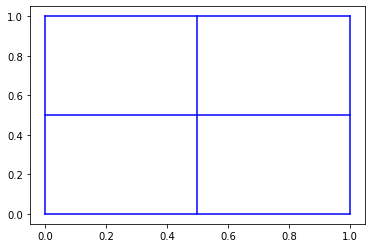

In [6]:
def example_2():    
    knots, degrees, P = make_square(origin=(0,0), 
                                    length=1.)
    
    t = 0.5
    Tu, Tv, pu, pv, P = insert_knot_bspline_surface(*knots, *degrees, P, t, 
                                times=1, 
                                axis=None)
    
    plot_surface((Tu, Tv), (pu, pv), P, 
                 weights=None, 
                 Nu=101, Nv=101, 
                 color='b')
    
example_2()

**Example 3**:

The following example shows how to create and plots a circle using NURBS.

We shall need the following function:

In [7]:
def make_circle(center=(0.,0.), radius=1.):
    Tu  = [0., 0., 0., 1, 1., 1.]
    Tv  = [0., 0., 0., 1, 1., 1.]
    pu = 2
    pv = 2
    nu = len(Tu) - pu - 1
    nv = len(Tv) - pv - 1
    gridu = np.unique(Tu)
    gridv = np.unique(Tv)


    s = 1./np.sqrt(2)
    P          = np.zeros((nu,nv,2))
    P[0,0,:]   = np.asarray([-s   , -s   ])
    P[1,0,:]   = np.asarray([-2*s , 0.   ])
    P[2,0,:]   = np.asarray([-s   , s    ])
    P[0,1,:]   = np.asarray([0.   , -2*s ])
    P[1,1,:]   = np.asarray([0.   , 0.0  ])
    P[2,1,:]   = np.asarray([0.   , 2*s  ])
    P[0,2,:]   = np.asarray([s    , -s   ])
    P[1,2,:]   = np.asarray([2*s  , 0.   ])
    P[2,2,:]   = np.asarray([s    , s    ])

    P *= radius
    P[:,:,0] += center[0]
    P[:,:,1] += center[1]

    W       = np.zeros((3,3))
    W[0,0]  = 1.
    W[1,0]  = s
    W[2,0]  = 1.
    W[0,1]  = s
    W[1,1]  = 1.
    W[2,1]  = s
    W[0,2]  = 1.
    W[1,2]  = s
    W[2,2]  = 1.

    return (Tu, Tv), (pu, pv), P, W


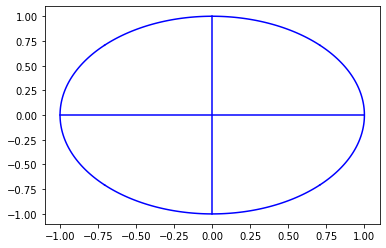

In [8]:
def example_3():    
    knots, degrees, P, W = make_circle(center=(0.,0.), radius=1.)
    
    t = 0.5
    Tu, Tv, pu, pv, P, W = insert_knot_nurbs_surface(*knots, *degrees, P, W, t, 
                                times=1, 
                                axis=None)
    
    plot_surface((Tu, Tv), (pu, pv), P, 
                 weights=W, 
                 Nu=101, Nv=101, 
                 color='b')
    
example_3()

In [9]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()